# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Customers Segmentation
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1Q43AkxxDy4g-zl5lIX4_PBJtTguh4Ise)

![alt text](https://drive.google.com/uc?id=1uS6vsccMt3koetsp3k9cAIfbpJw7Z1J8)

![alt text](https://drive.google.com/uc?id=1r1FjdO8duujUoI904Oy4vbza6KktxSXo)

![alt text](https://drive.google.com/uc?id=1vMr3ouoZ6Pc1mba1mBm2eovlJ3tfE6JA)

![alt text](https://drive.google.com/uc?id=1VvqzWWY8wFGeP4cl-rVtWVOg1P6saHfZ)

![alt text](https://drive.google.com/uc?id=1LpdL0-4E9lbc4s-x6eJ5zkyIVw_OpHuJ)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


C:\Users\vikasbhadoria\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Marketing_data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Mean balance is 1564 
#### Balance frequency is frequently updated on average ~0.9
#### Purchases average is 1000
#### one off purchase average is 600
#### Average purchases frequency is around 0.5
#### average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
#### Average credit limit ~ 4500
#### Percent of full payment is 15%
#### Average tenure is 11 years

In [4]:
# Let's see who made one off purchase of $40761!
df[df['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [5]:
df['CASH_ADVANCE'].max()

47137.211760000006

In [6]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
df[df['CASH_ADVANCE']==47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

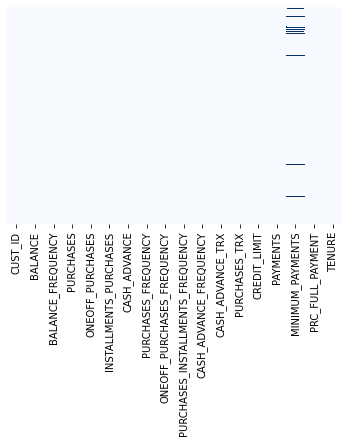

In [7]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(df.isnull(),yticklabels=False,cmap='Blues',cbar=False)

In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [10]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

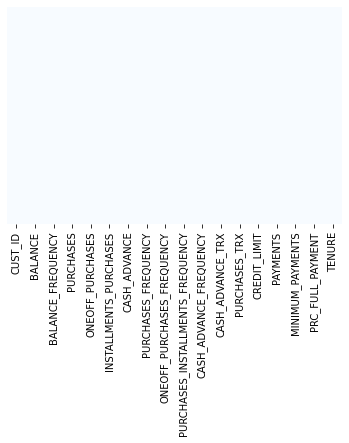

In [11]:
sns.heatmap(df.isnull(),cbar=False,cmap='Blues',yticklabels=False)

In [12]:
# Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

In [13]:
# Let's drop Customer ID since it has no meaning here 
df.drop("CUST_ID",axis=1,inplace=True)
df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [14]:
n = len(df.columns)
n

17

In [15]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

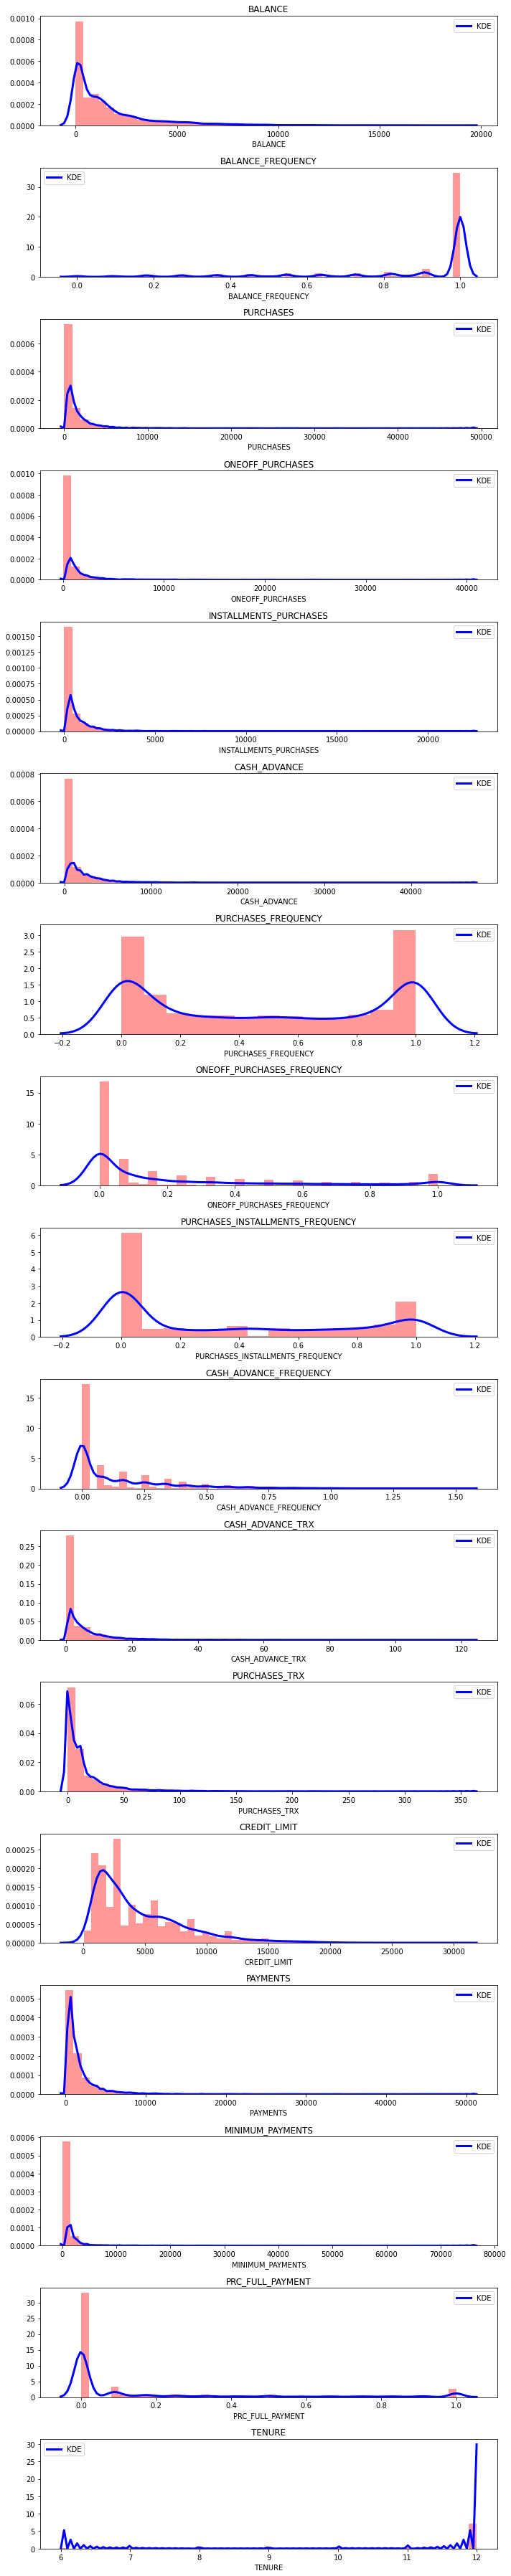

In [16]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 
plt.figure(figsize=(10,50))
for i in range(n):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]],kde_kws={'color':'b','lw':3,'label':'KDE'},hist_kws={'color':'r'})
    plt.title(df.columns[i])
plt.tight_layout()

#### Mean of balance is 1500
#### 'Balance_Frequency' for most customers is updated frequently ~1
#### For 'PURCHASES_FREQUENCY', there are two distinct group of customers
#### For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
#### Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
#### Credit limit average is around 4500
#### Most customers are ~11 years tenure

In [17]:
correlations = df.corr()

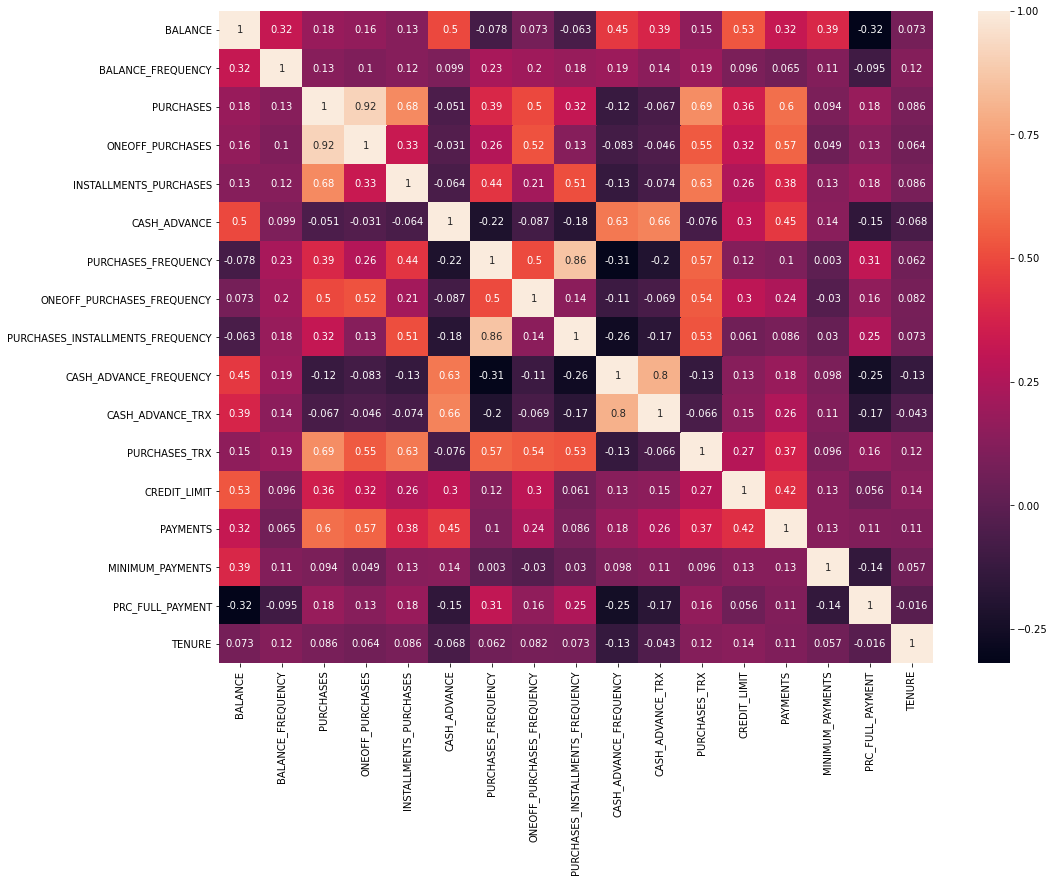

In [18]:
plt.figure(figsize=(16,12))
sns.heatmap(correlations,annot=True)
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'


# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

![alt text](https://drive.google.com/uc?id=1EBCmP06GuRjVfPgTfH85Yhv9xIAZUj-K)

![alt text](https://drive.google.com/uc?id=1EYWyoec9Be9pYkOaJTjPooTPWgRlJ_Xz)

![alt text](https://drive.google.com/uc?id=1ppL-slQPatrmHbPBEaT3-8xNH01ckoNE)

![alt text](https://drive.google.com/uc?id=1Yfi-dpWW3keU5RLgwAT4YmQ2rfY1GxUh)

![alt text](https://drive.google.com/uc?id=1bLRDIZRda0NSTAdcbugasIjDjvgw4JIU)

![alt text](https://drive.google.com/uc?id=1rBQziDU0pS1Fz0m8VQRjQuBoGFSX1Spb)

![alt text](https://drive.google.com/uc?id=1BOX2q8R_8E4Icb4v1tpn1eymCTJY2b5o)

![alt text](https://drive.google.com/uc?id=1v7hJEPiigSeTTaYo0djbO-L4uEnTpcAU)

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [19]:
# Let's scale the data first
scaler = StandardScaler()

In [20]:
scaled_data = scaler.fit_transform(df)
scaled_data.shape

(8950, 17)

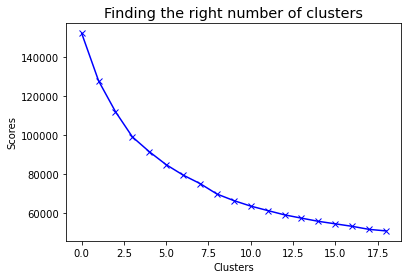

In [21]:
scores_1 = []

range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    scores_1.append(kmeans.inertia_)
plt.plot(scores_1, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

In [22]:
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 8.

# TASK #6: APPLY K-MEANS METHOD

In [23]:
kmeans = KMeans(8)
kmeans.fit(scaled_data)
labels = kmeans.labels_

In [24]:
kmeans.cluster_centers_.shape

(8, 17)

In [25]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_,columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.110122,0.393628,-0.334059,-0.215111,-0.394556,-0.193136,-0.770829,-0.304248,-0.737262,-0.040336,-0.130390,-0.452118,-0.379413,-0.277400,-0.081356,-0.445060,0.277493
1,-0.391836,0.330445,-0.036296,-0.231747,0.339776,-0.375606,0.999000,-0.353125,1.195322,-0.491360,-0.371370,0.178028,-0.285066,-0.227658,-0.046325,0.331211,0.253071
2,1.724805,0.336565,0.064922,0.046650,0.067432,3.950942,-0.173060,0.081139,-0.131429,2.562381,3.766145,0.065584,1.263822,2.649995,0.556093,-0.196679,0.028157
3,1.443847,0.414656,7.093187,6.244031,5.297641,0.004274,1.081960,1.867817,1.035380,-0.299540,-0.116878,4.699112,2.171463,4.847281,1.104788,0.830765,0.333341
4,0.135052,0.430900,0.965244,0.911178,0.608296,-0.301699,1.108143,1.885270,0.561278,-0.400603,-0.310996,1.237578,0.711866,0.408646,-0.049487,0.470236,0.307692
5,-0.701809,-2.148082,-0.307115,-0.230871,-0.301902,-0.322388,-0.549422,-0.431916,-0.440347,-0.520549,-0.377052,-0.417449,-0.168809,-0.201882,-0.256806,0.295462,0.199560
6,1.411731,0.414363,-0.299969,-0.219905,-0.305317,1.123411,-0.619673,-0.325543,-0.534210,1.454314,1.116736,-0.366439,0.749849,0.209535,0.571710,-0.454099,0.122335
7,-0.343513,-0.347251,-0.286103,-0.211696,-0.287199,0.061216,-0.189560,-0.271606,-0.222620,0.296456,-0.005414,-0.384957,-0.557203,-0.390506,-0.211145,0.018084,-3.211205


In [26]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers,columns = [df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1335.264609,0.970518,289.481760,235.396807,54.275586,573.855461,0.180979,0.111695,0.071430,0.127072,2.359014,3.471880,3113.989471,930.098202,674.609588,0.023542,11.888675
1,748.901181,0.955550,925.658102,207.784678,718.323212,191.207222,0.891297,0.097114,0.839489,0.036818,0.714502,19.134945,3457.260928,1074.096727,756.248261,0.250588,11.855992
2,5154.511231,0.957000,1141.912200,669.866900,472.045300,9264.182091,0.420893,0.226663,0.312204,0.647903,28.950000,16.340000,9092.750000,9404.620189,2160.156999,0.096190,11.555000
3,4569.720859,0.975499,16157.907683,10956.249146,5201.658537,987.833746,0.924593,0.759664,0.775924,0.075203,2.451220,131.512195,12395.121951,15765.548522,3438.869446,0.396699,11.963415
4,1845.575182,0.979347,3065.464118,2104.805649,961.141950,346.194749,0.935102,0.764870,0.587503,0.054979,1.126511,45.471394,7084.510292,2916.132609,748.879317,0.291251,11.929089
5,103.718364,0.368410,347.048115,209.238744,138.061324,302.807550,0.269841,0.073609,0.189432,0.030977,0.675722,4.333616,3880.254197,1148.716651,265.730496,0.240132,11.784380
6,4502.872873,0.975429,362.316140,227.439990,134.973534,3334.715494,0.241646,0.105342,0.152128,0.426167,10.869732,5.601533,7222.705503,2339.728588,2196.552157,0.020899,11.681034
7,849.482131,0.795010,391.940690,241.065457,151.356774,1107.244622,0.414271,0.121432,0.275962,0.194468,3.211878,5.141252,2467.117896,602.667731,372.141435,0.159004,7.219904


In [27]:
labels.shape # Labels associated to each data point

(8950,)

In [28]:
labels.max()

7

In [29]:
labels.min()

0

In [30]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans

array([4, 0, 1, ..., 7, 7, 7])

In [31]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


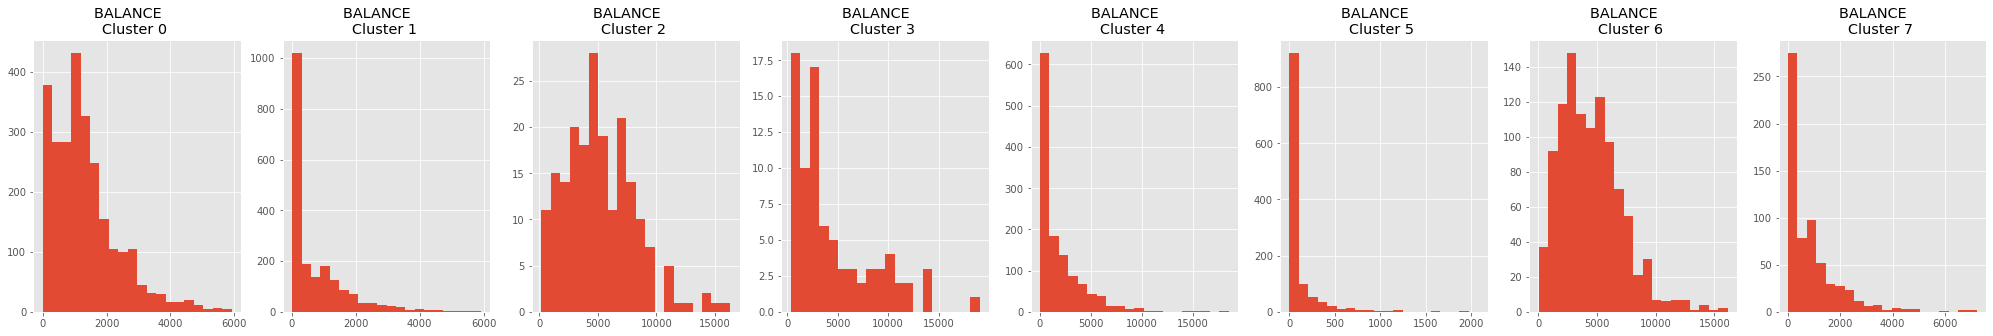

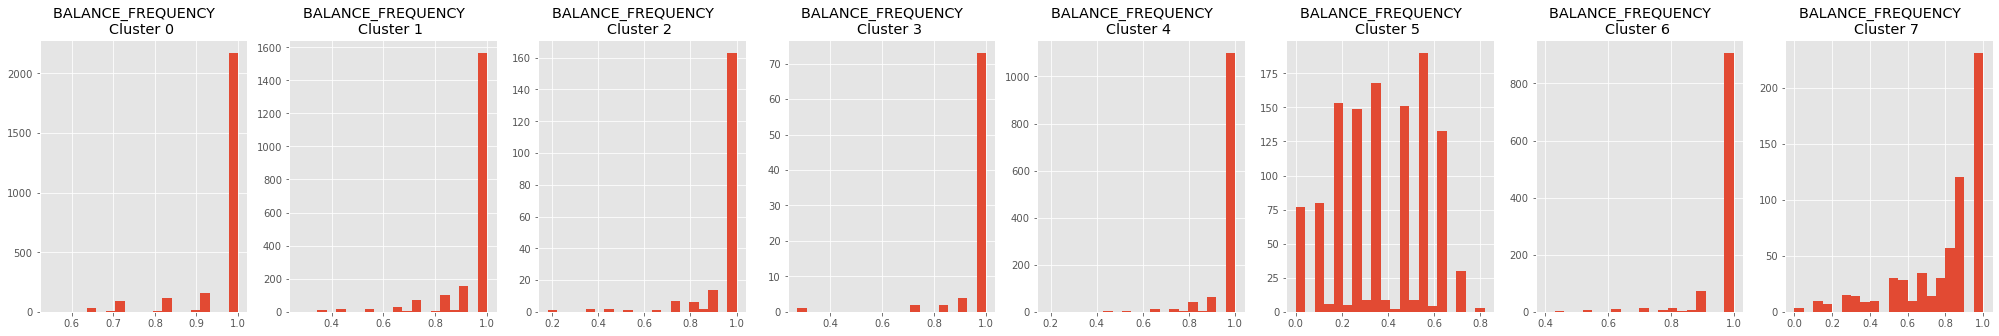

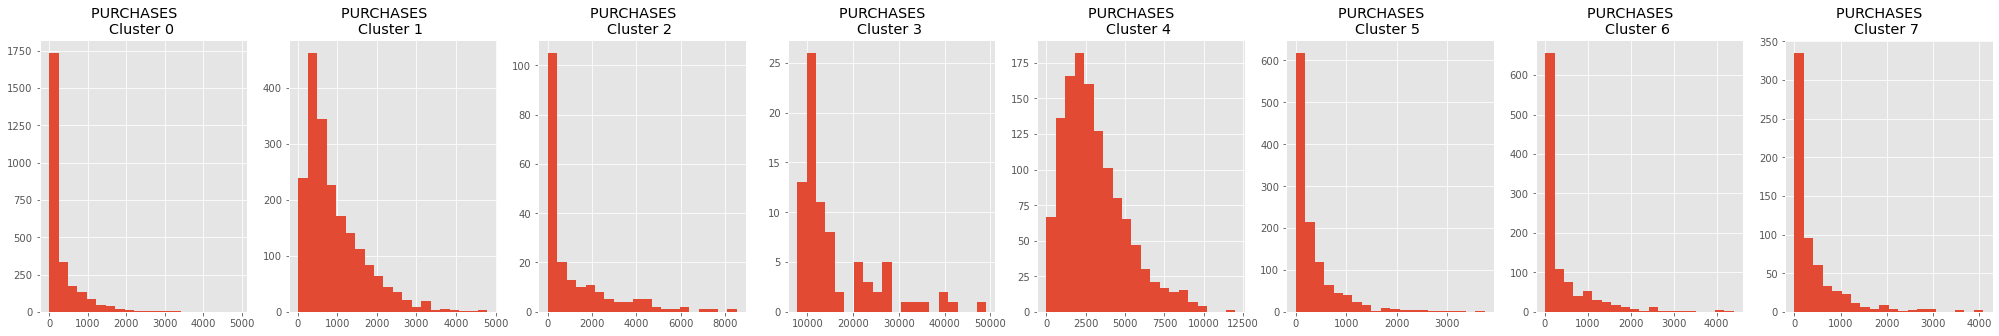

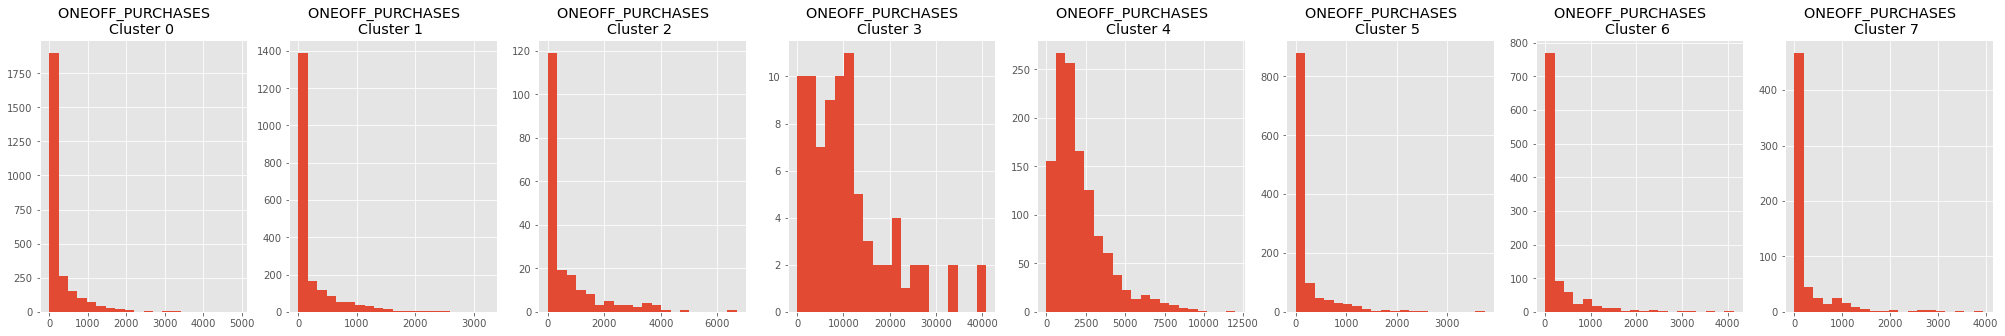

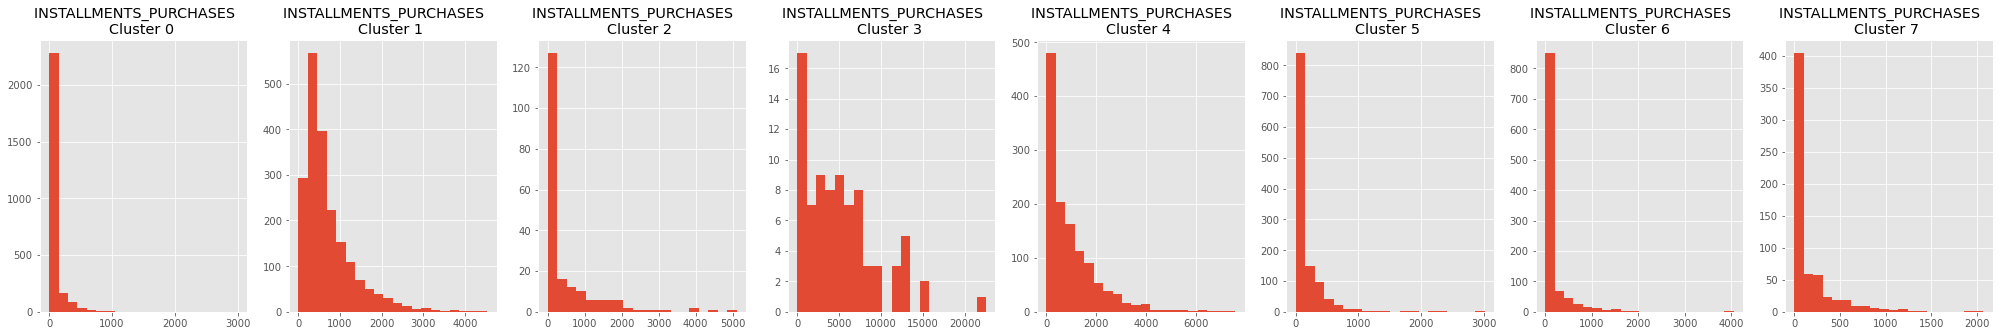

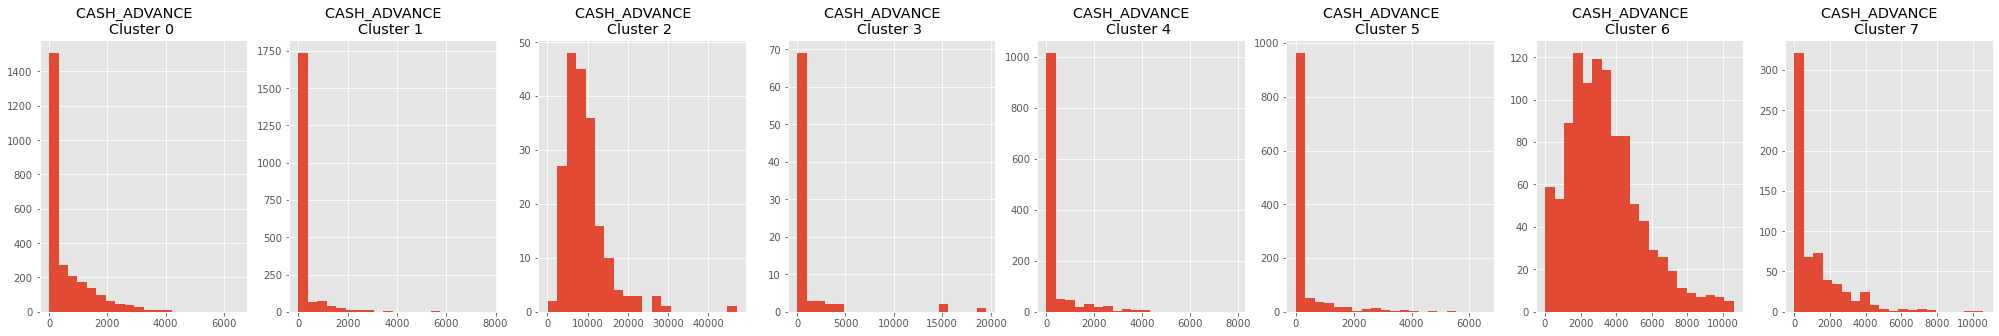

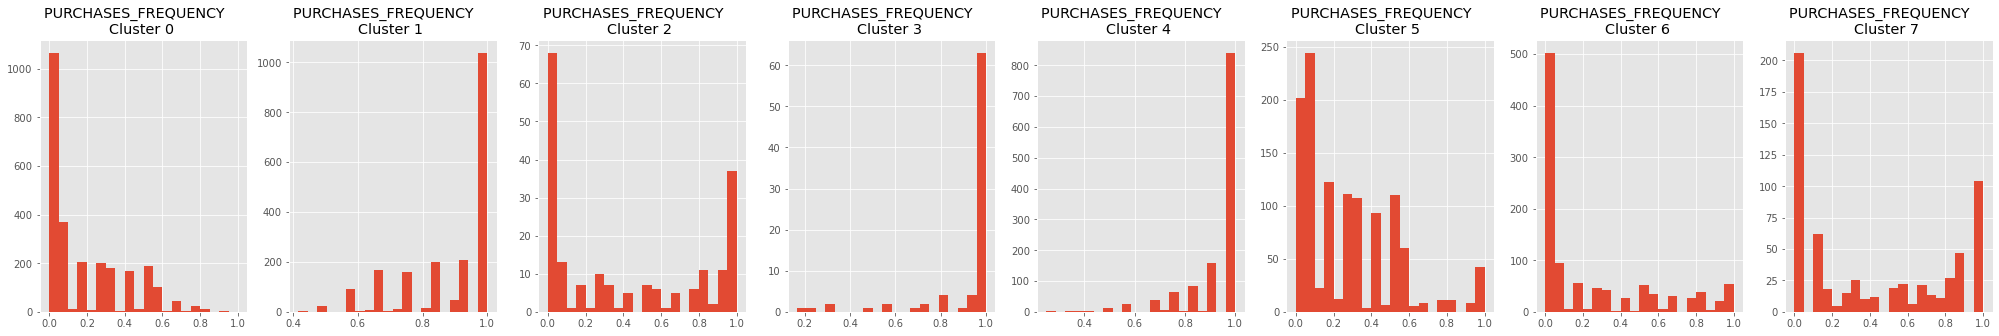

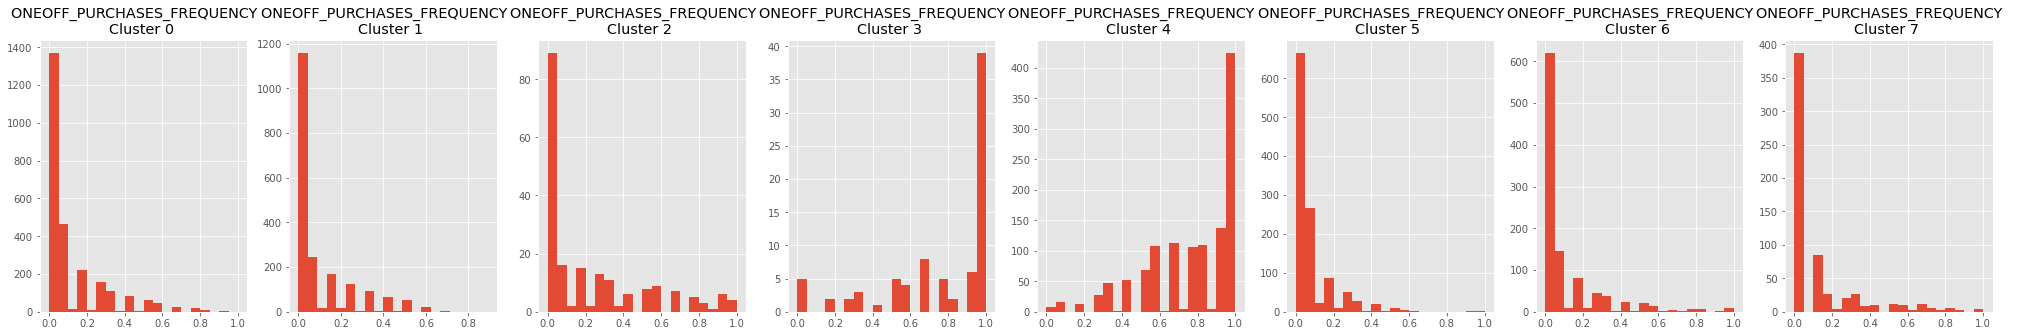

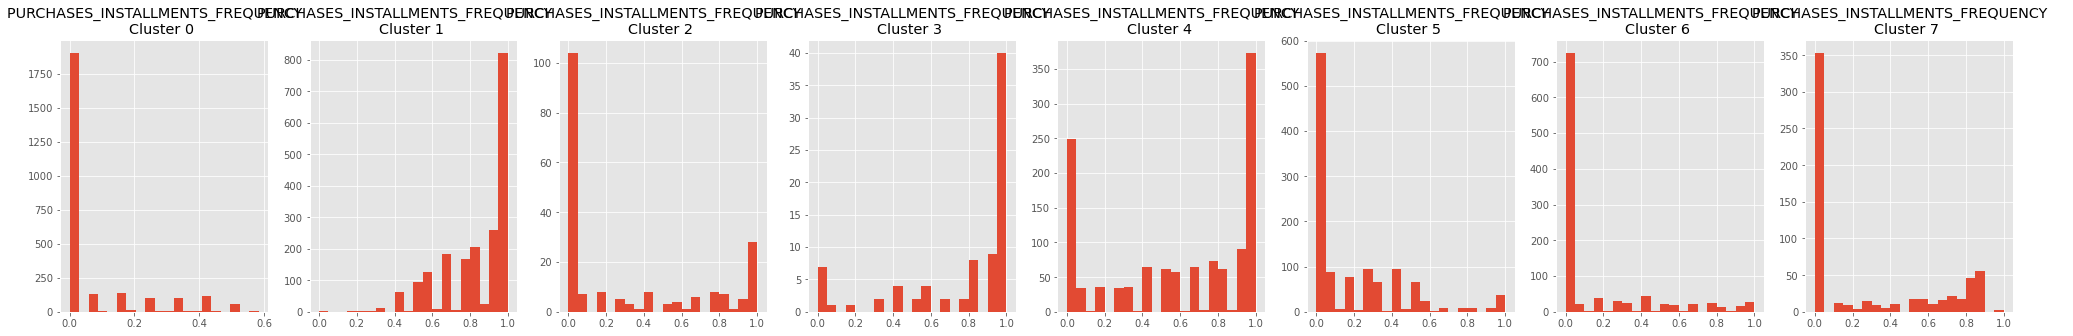

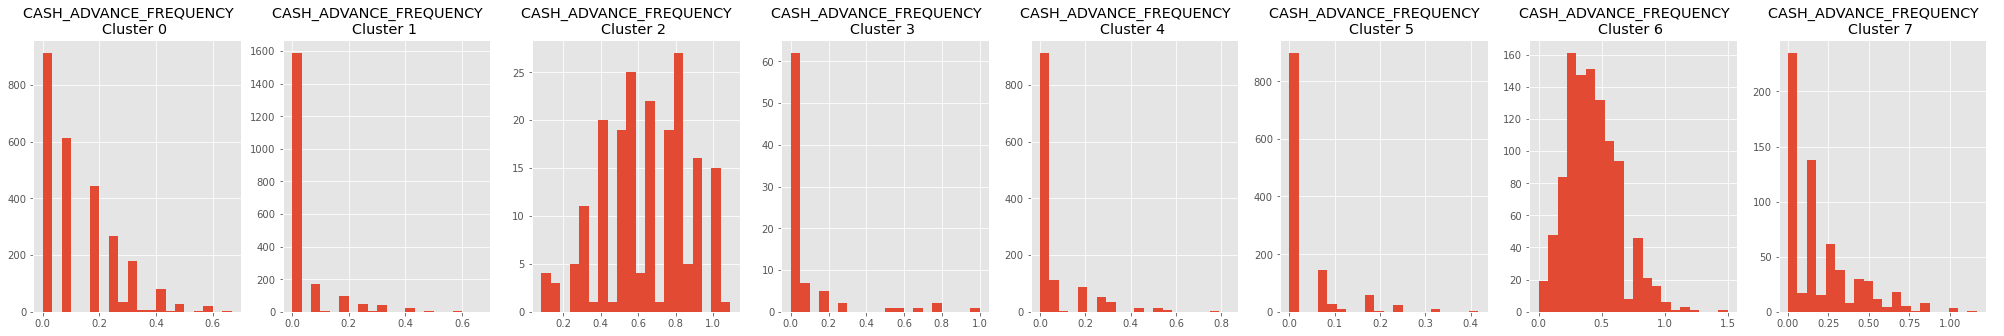

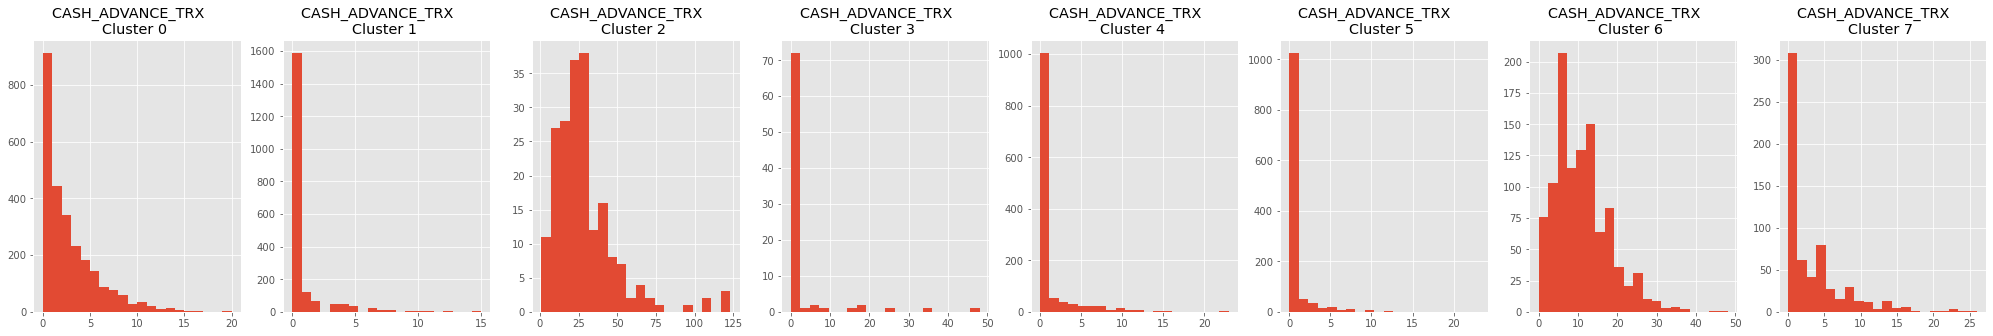

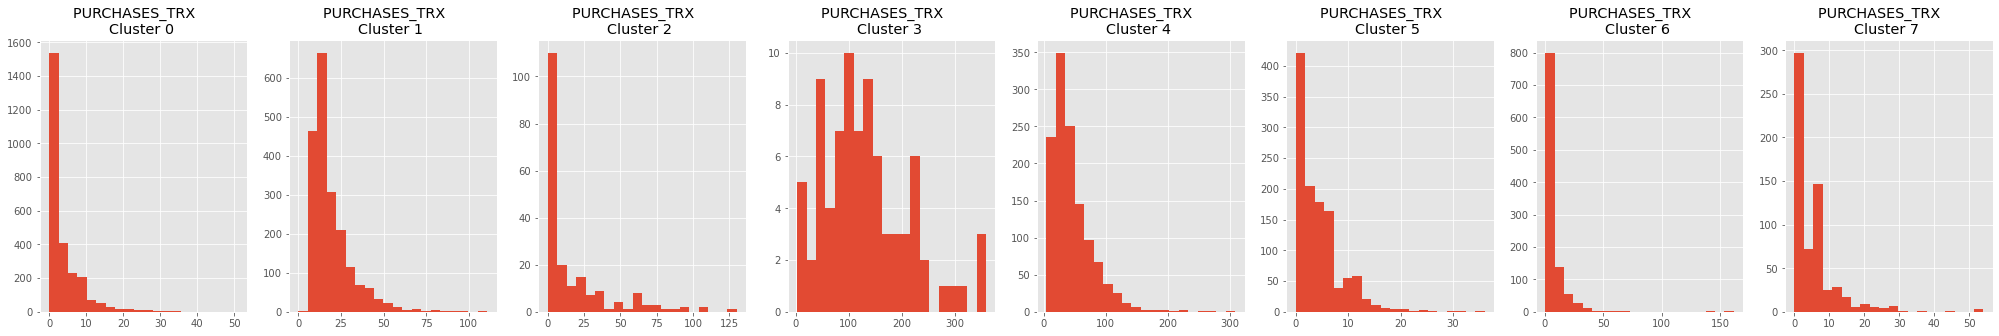

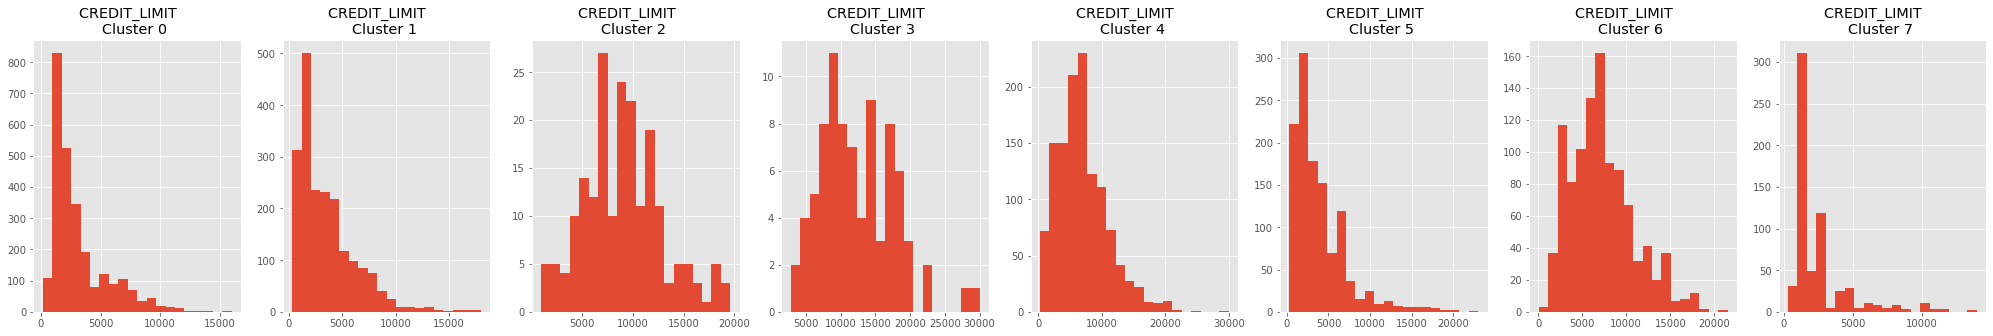

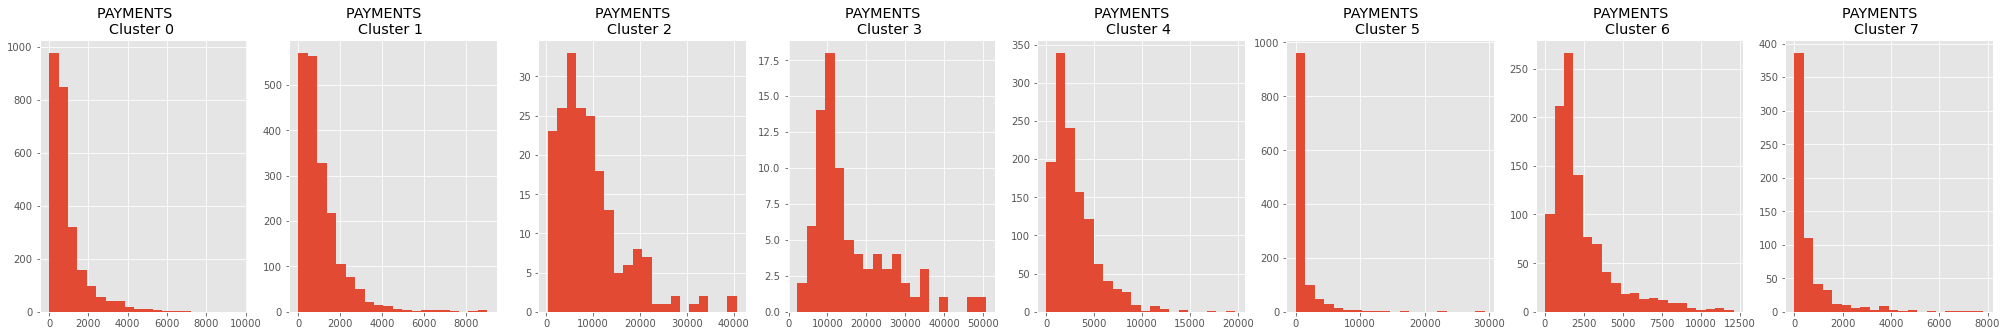

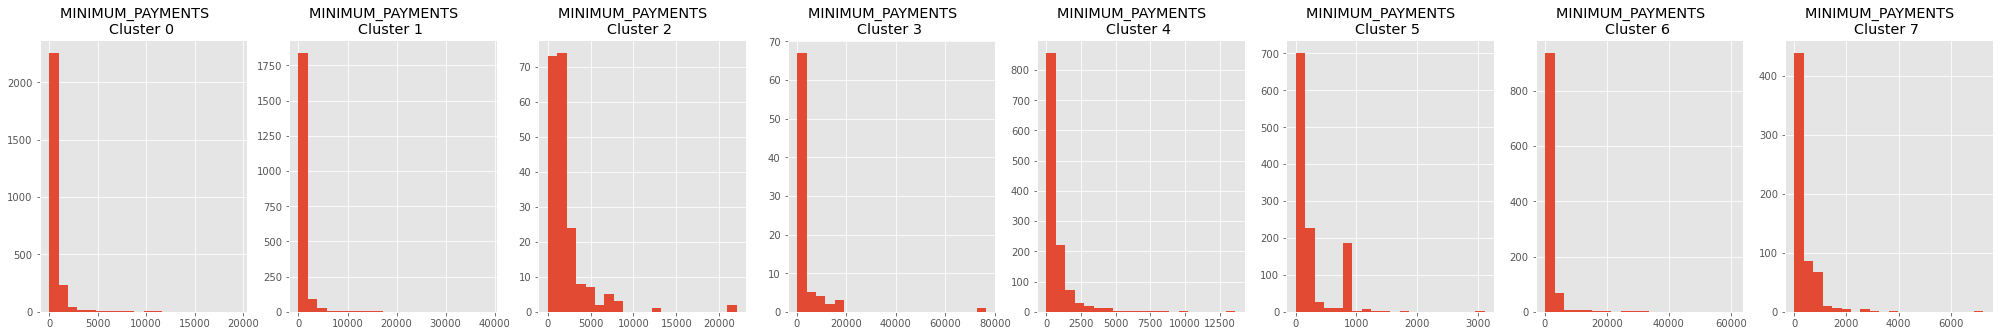

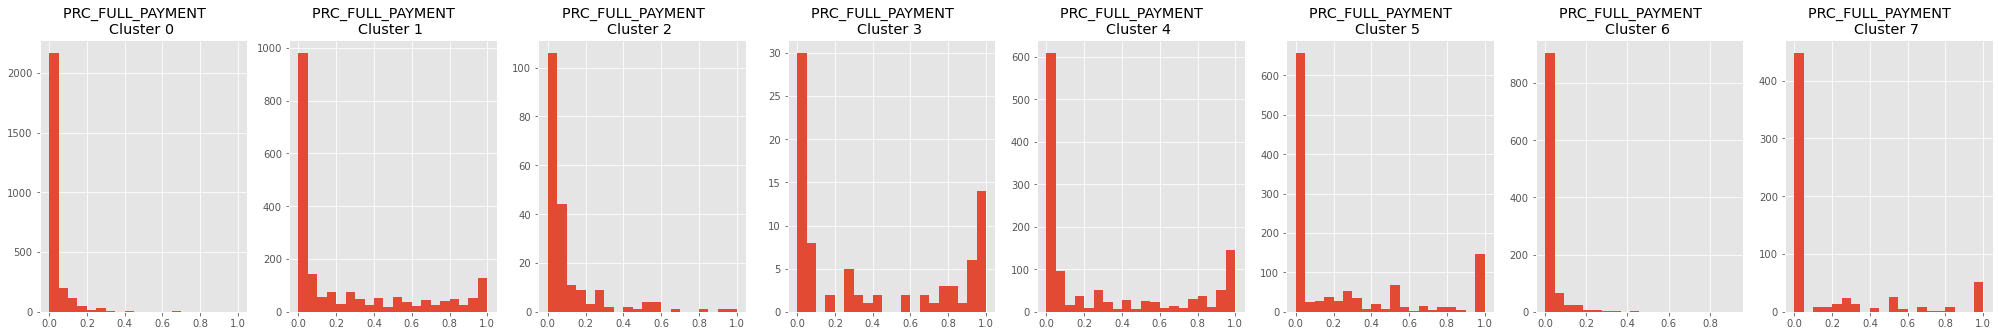

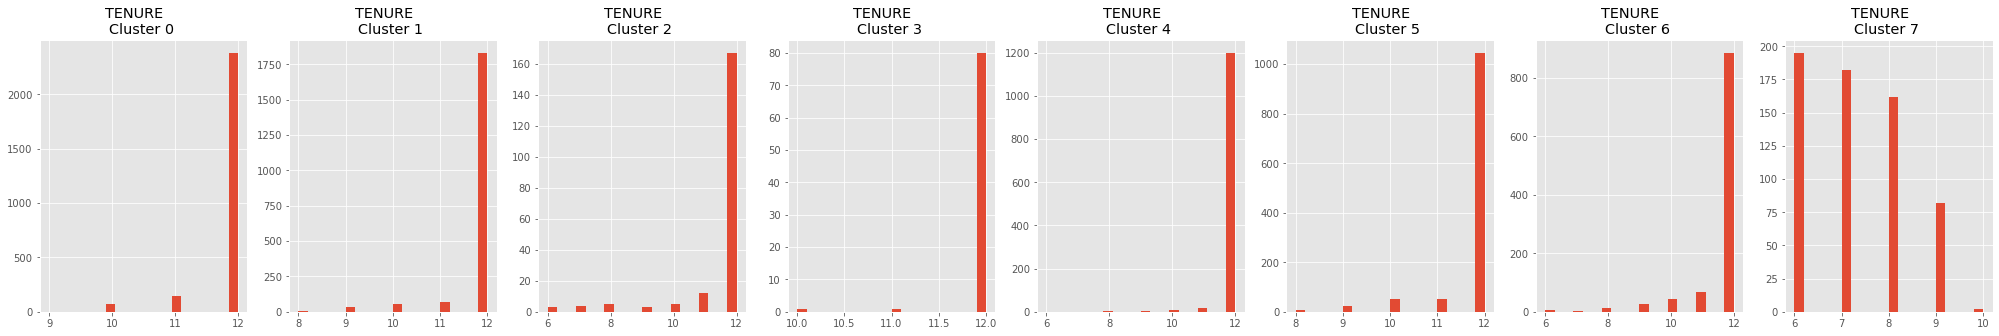

In [32]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [33]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(scaled_data)
principal_comp

array([[-1.68222071, -1.07645063],
       [-1.13829861,  2.50646587],
       [ 0.96968353, -0.38350967],
       ...,
       [-0.92620203, -1.81078948],
       [-2.33654959, -0.65796632],
       [-0.556421  , -0.40046315]])

In [34]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df.sample(5)

,pca1,pca2
6359,-1.834958,-0.361269
8023,-0.533545,-2.227372
2370,-1.520678,-0.008582
6484,1.293425,1.160866
1783,-1.830153,-0.029871


In [35]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076451,0
1,-1.138299,2.506466,6
2,0.969684,-0.383510,4
3,-0.873630,0.043172,0
4,-1.599433,-0.688583,0


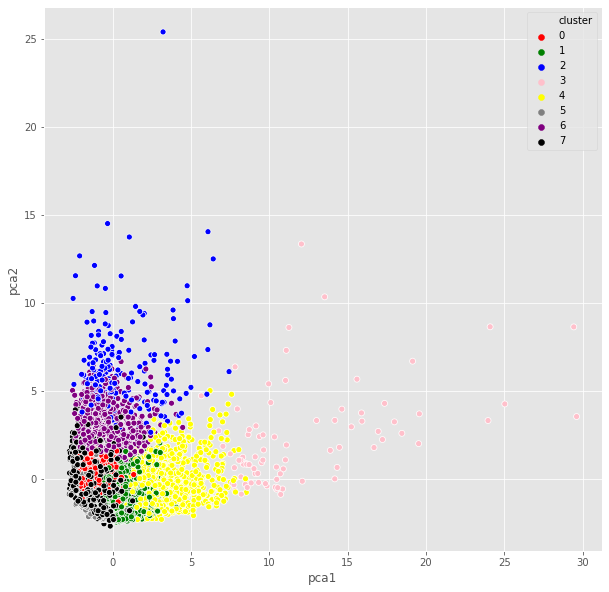

In [36]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [37]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

Using TensorFlow backend.


In [38]:
encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [39]:
scaled_data.shape

(8950, 17)

In [40]:
autoencoder.fit(scaled_data,scaled_data,batch_size=128,epochs=25,verbose=1)

Train on 8950 samples
Epoch 1/25
8950/8950 [==============================] - 6s 670us/sample - loss: 0.6086
Epoch 2/25
8950/8950 [==============================] - 5s 556us/sample - loss: 0.3983
Epoch 3/25
8950/8950 [==============================] - 5s 540us/sample - loss: 0.3292
Epoch 4/25
8950/8950 [==============================] - 5s 543us/sample - loss: 0.2743
Epoch 5/25
8950/8950 [==============================] - 5s 542us/sample - loss: 0.2383
Epoch 6/25
8950/8950 [==============================] - 5s 535us/sample - loss: 0.2109
Epoch 7/25
8950/8950 [==============================] - 5s 543us/sample - loss: 0.1954
Epoch 8/25
8950/8950 [==============================] - 5s 533us/sample - loss: 0.1925
Epoch 9/25
8950/8950 [==============================] - 5s 525us/sample - loss: 0.1699
Epoch 10/25
8950/8950 [==============================] - 5s 550us/sample - loss: 0.1620
Epoch 11/25
8950/8950 [==============================] - 5s 529us/sample - loss: 0.1526
Epoch 12/25
8950/89

In [41]:
#autoencoder.save_weights('autoencoder.h5')

In [42]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              22000 

In [43]:
pred_ac = encoder.predict(scaled_data)

In [44]:
pred_ac.shape

(8950, 10)

### As seen that the shape of our input has reduced. Now using this as an input and repeting the whole process with the reduced input. 

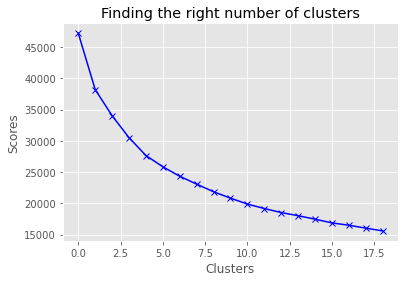

In [45]:
scores_2 = []

range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred_ac)
    scores_2.append(kmeans.inertia_)
plt.plot(scores_2, 'bx-')
plt.style.use('ggplot')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

#### So as per my observations I find the optimal value of clusters to be 4 as the curve seems to be linear after 4

### Comparing both the results, using Autoencoders and by not using Autoencoders

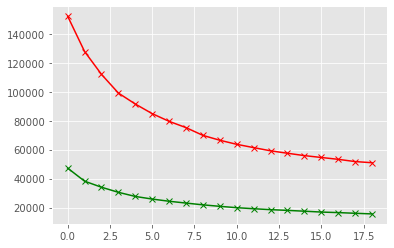

In [48]:
plt.plot(scores_1, 'bx-', color = 'r',label='Without Autoencode')
plt.plot(scores_2, 'bx-', color = 'g',label='With Autoencode')

## Apply Kmeans algorithm

In [49]:
kmeans = KMeans(4)
kmeans.fit(pred_ac)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(4, 10)

In [51]:
y_kmeans = kmeans.fit_predict(scaled_data)
y_kmeans

array([2, 1, 0, ..., 0, 2, 2])

In [52]:
# concatenate the new reduced clusters labels to our original dataframe
creditcard_df_cluster_new = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


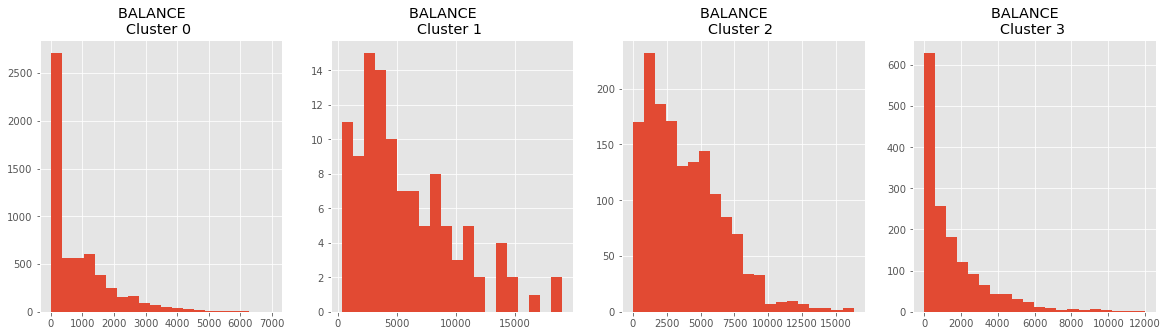

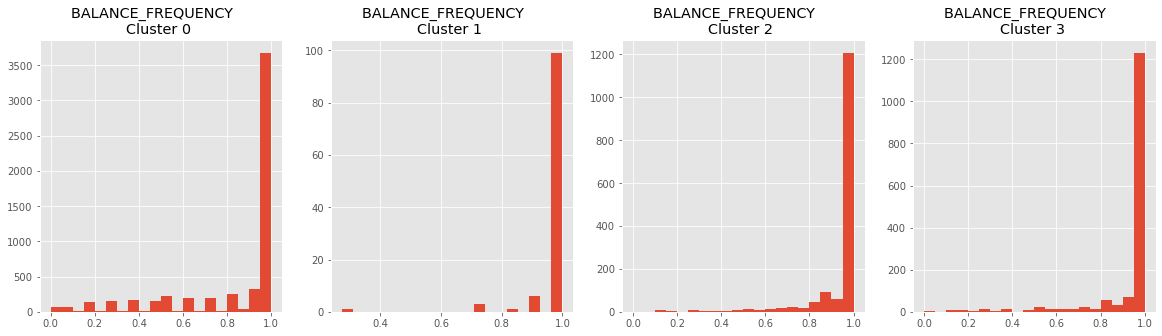

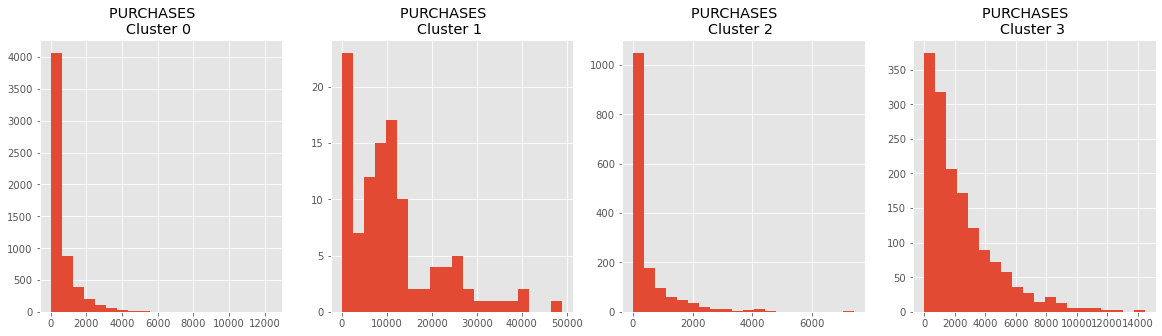

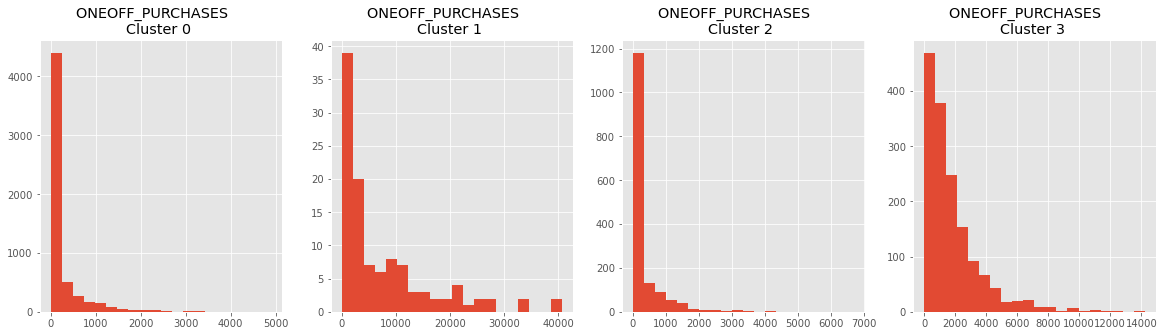

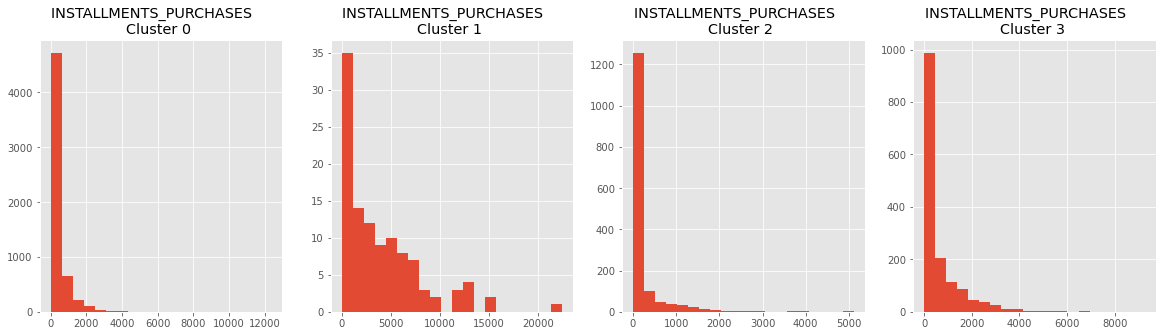

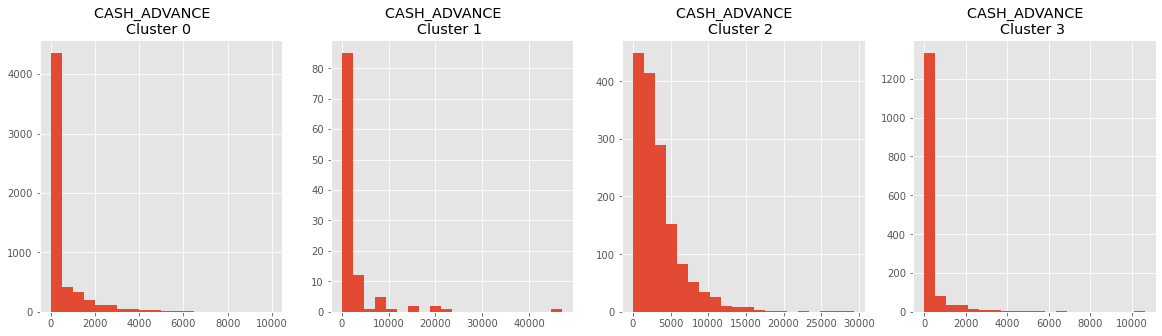

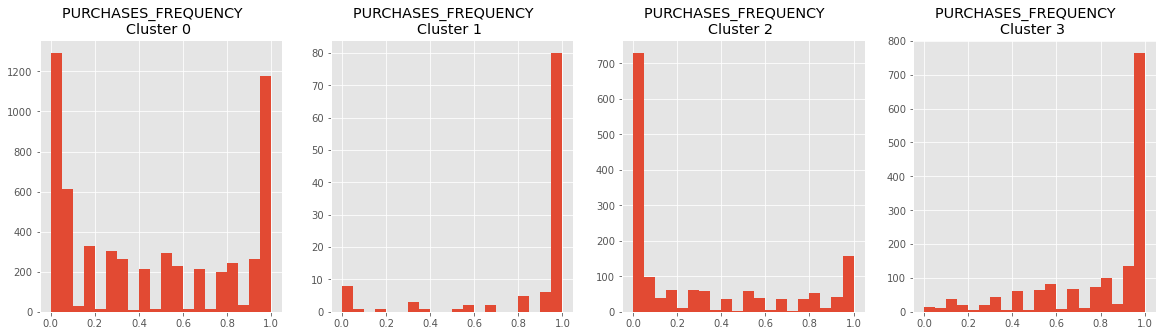

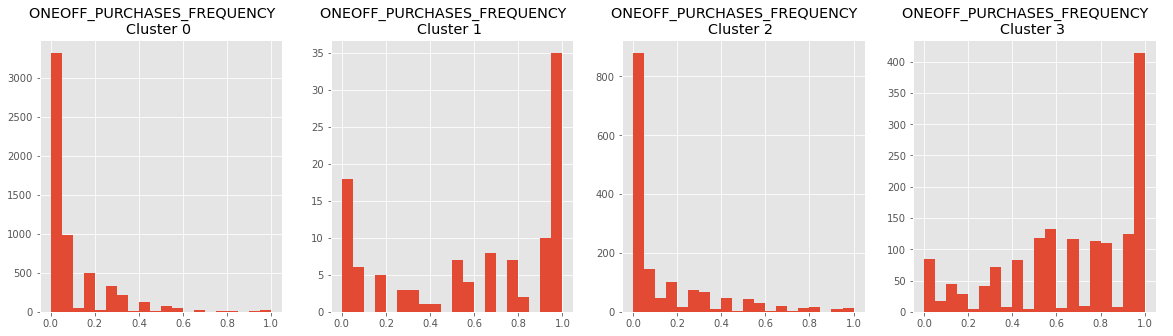

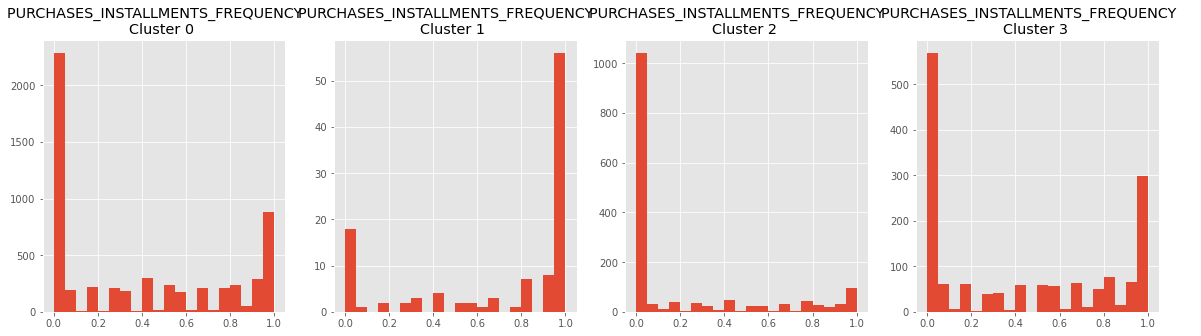

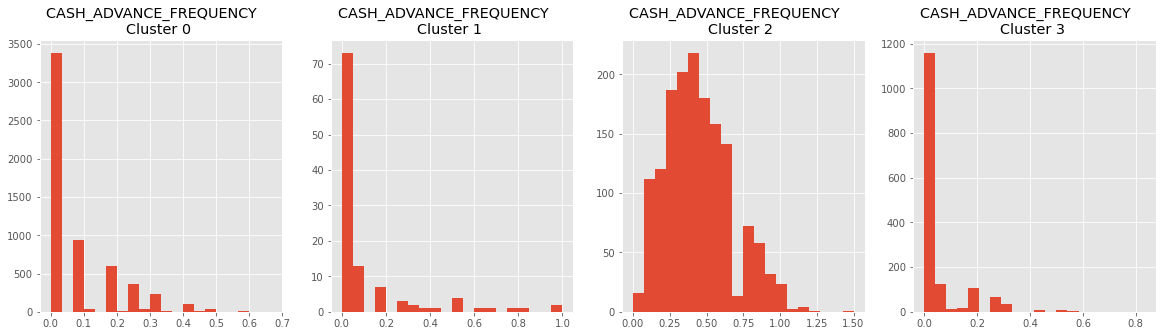

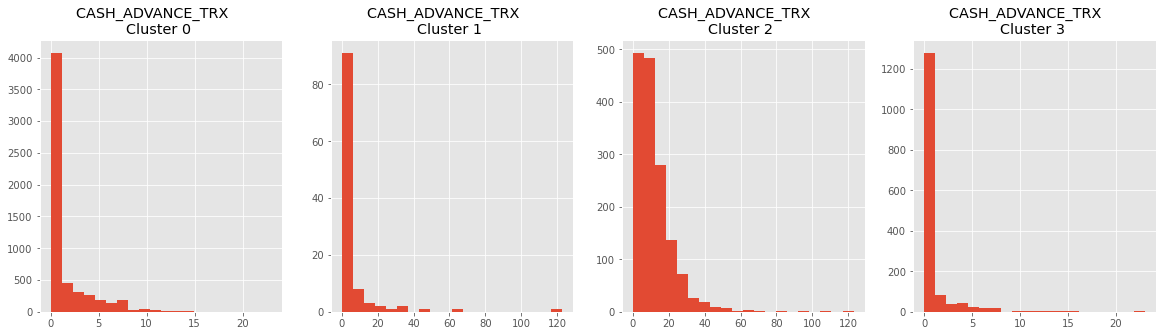

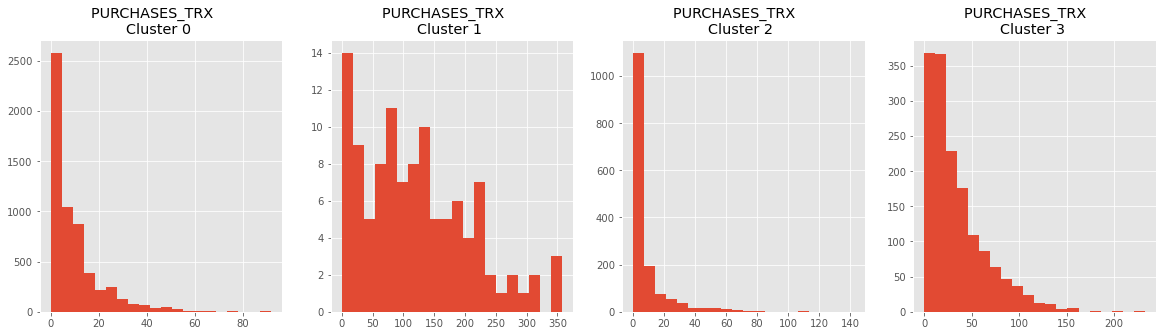

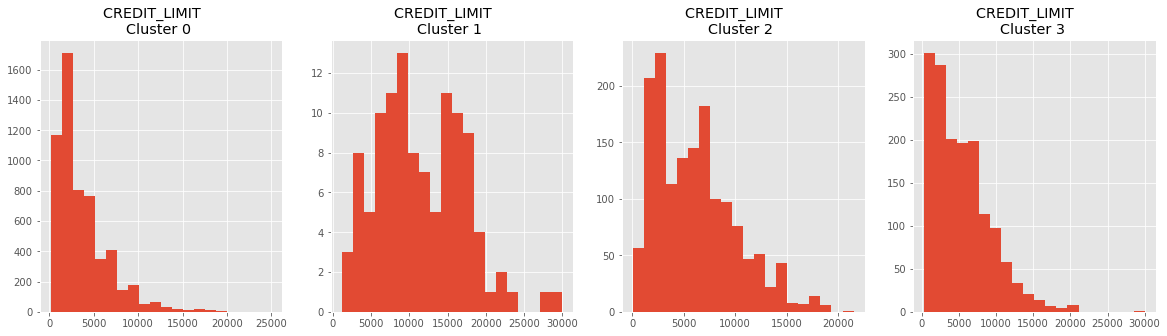

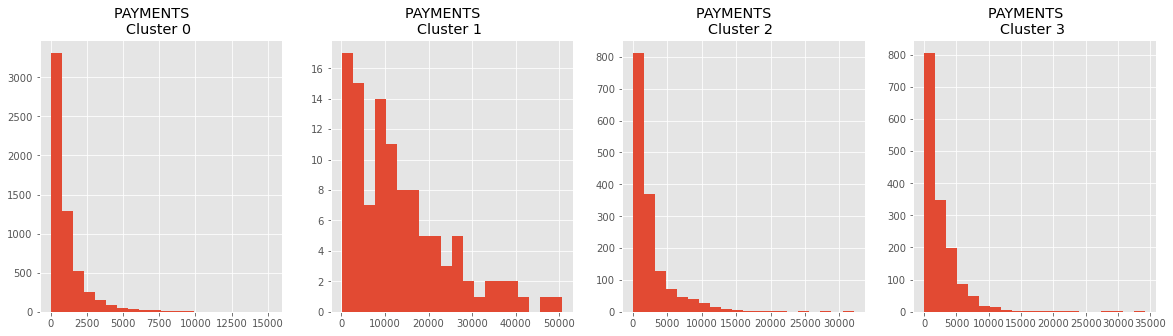

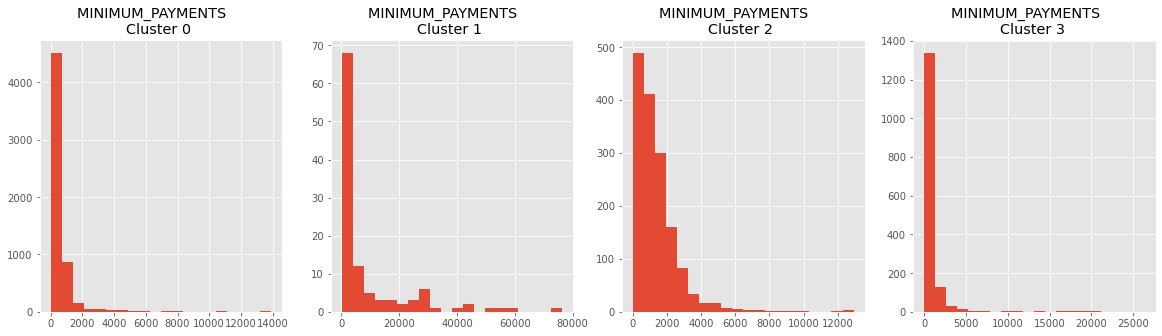

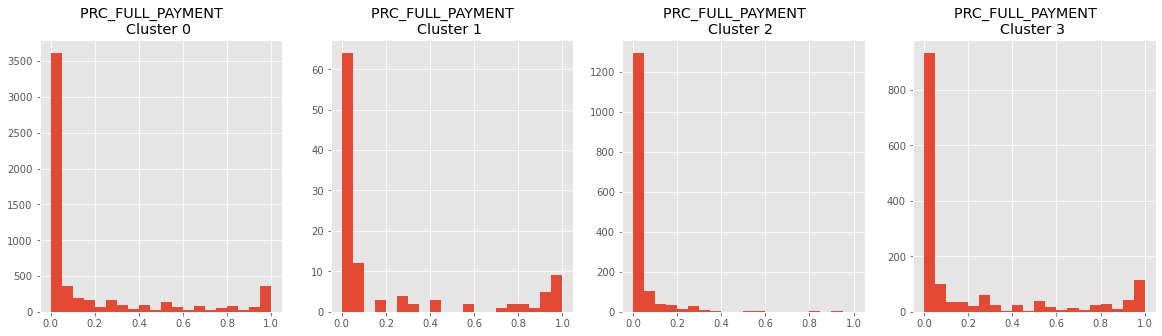

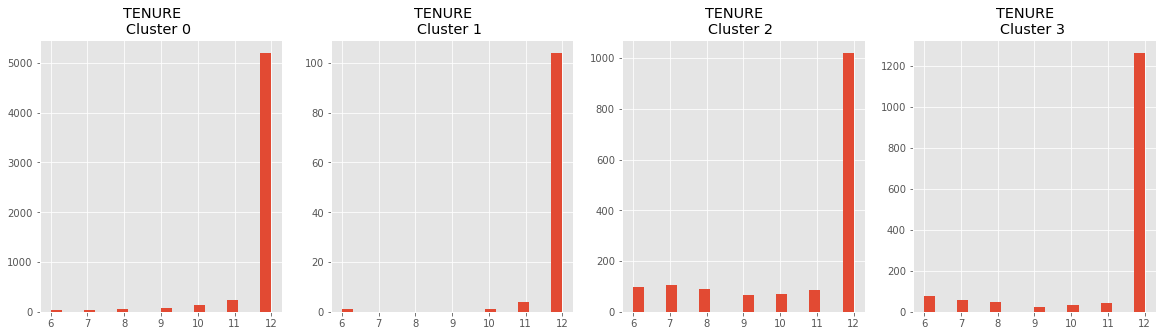

In [54]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (20, 5))
  for j in range(4):
    plt.subplot(1,4,j+1)
    cluster = creditcard_df_cluster_new[creditcard_df_cluster_new['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

## APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS of the new encoded reduced data

In [56]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp_new = pca.fit_transform(pred_ac)
principal_comp_new

array([[-0.875141  , -0.01699963],
       [-0.35342237,  0.3141001 ],
       [ 1.9523125 ,  0.11276434],
       ...,
       [ 0.14141554,  0.05277731],
       [ 0.6185489 ,  1.18577   ],
       [ 2.6615338 ,  1.2097651 ]], dtype=float32)

In [57]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data=principal_comp_new,columns=['pca1','pca2'])
pca_df.sample(5)

,pca1,pca2
3676,3.589016,-2.550825
4322,-0.671819,0.255161
454,1.404811,0.374567
2480,-0.670207,-0.950153
6538,0.531754,2.230831


In [58]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.875141,-0.017000,0
1,-0.353422,0.314100,0
2,1.952312,0.112764,3
3,-1.053516,-0.176814,0
4,-0.348777,0.107060,0


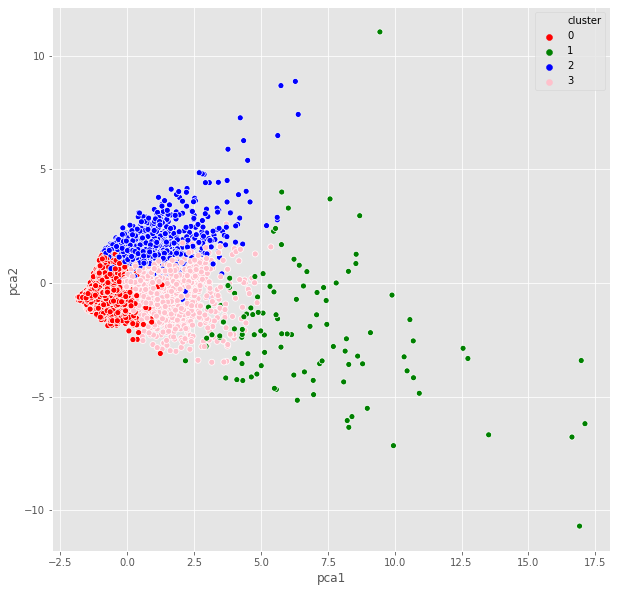

In [60]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink'])
plt.show()

## Here we can see that by using autoencoders I was able to make clusters of data with very less overlapping. This is more meaningful clustering/segmentations of the customers. I will now be able to tell my clients that they have 4 different types of customers and each can be targeted in a different way. Autoencoding really helped in this case. 

## So to summarize all the steps:
#### 1. Load the data & just have a brief look at it. Try to find information(.info), use .describe. By doing so you will be able to get good understanding of the data. Try to understand all the features and what do they mean as this is very important to understand which features are the most important or which are the least important. If possible try to ask questions to the team/person who has provided you the dataset. This step is important in a real world project. 

#### 2. Do some exploratory data analysis (EDA). Find missing values. Handling missing values is a critical step. You have to ask youe self this question. 

Is this value missing becuase it wasn't recorded or becuase it dosen't exist?

If a value is missing becuase it doens't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probalby do want to keep as NaN. On the other hand, if a value is missing becuase it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. (This is called "imputation") :)

#### Make some really good graphs by extracting information from the data. As a data scientist you might be asked for presentations of your work/product. Beautiful graphs really helps a lot.

#### 3. Now comes the Machine learning part. For this dataset I used unsupervised learning. Find the optimum number of clusters by using 'Elbow Method'. Apply Kmeans clustering and then use PCA dimensionality reduction technique to make a graph of your clusters.

#### 4. Use Autoencoding technique to encode the original data and reduce its dimensions. Then use the reduced encoded data as a new input and follow step 3 again.